Dataset 1:


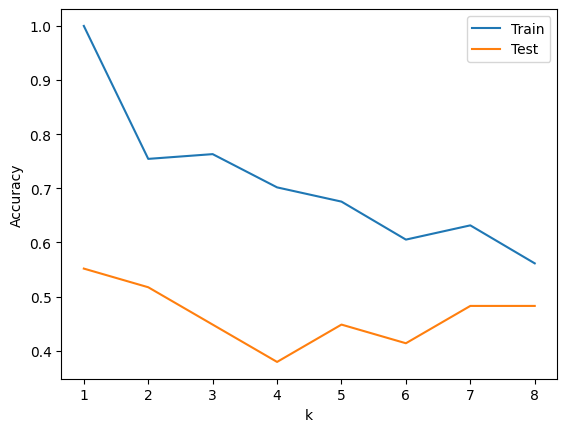

Accuracy: 0.4482758620689655
Precision: 0.5
Recall: 0.25
F1 score: 0.3333333333333333
Confusion matrix:
[[ 9  4]
 [12  4]]

Dataset 2:


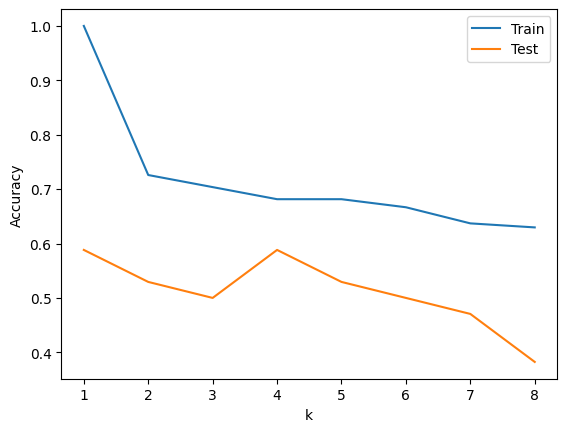

Accuracy: 0.5
Precision: 0.5384615384615384
Recall: 0.3888888888888889
F1 score: 0.45161290322580644
Confusion matrix:
[[10  6]
 [11  7]]

Dataset 3:


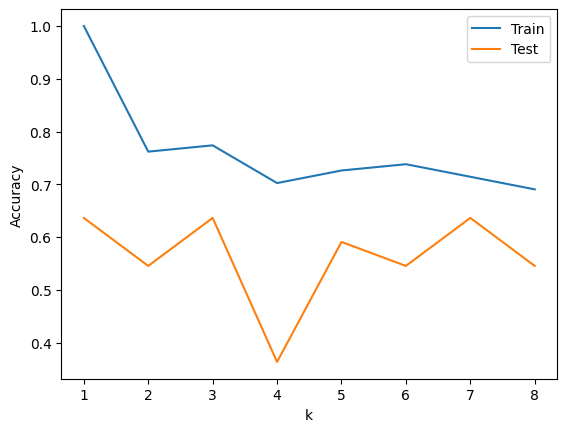

Accuracy: 0.6363636363636364
Precision: 0.8888888888888888
Recall: 0.5333333333333333
F1 score: 0.6666666666666667
Confusion matrix:
[[6 1]
 [7 8]]



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Генерация случайных данных
def generate_data(num_points):
    np.random.seed(0)
    X = np.random.randn(num_points, 2)
    y = np.random.choice([0, 1], size=num_points)
    return X, y

# KNN классификация и оценка модели
def knn_classification(X_train, y_train, X_test, y_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    return train_accuracy, test_accuracy

# Построение графика точности классификации при разных k
def plot_accuracy(X_train, y_train, X_test, y_test):
    k_values = range(1, 9)
    train_accuracies = []
    test_accuracies = []

    for k in k_values:
        train_accuracy, test_accuracy = knn_classification(X_train, y_train, X_test, y_test, k)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    plt.plot(k_values, train_accuracies, label='Train')
    plt.plot(k_values, test_accuracies, label='Test')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Вычисление метрик и построение матрицы расхождений
def evaluate_model(X_train, y_train, X_test, y_test):
    best_k = 3
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    confusion = confusion_matrix(y_test, y_test_pred)

    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 score: {f1}')
    print('Confusion matrix:')
    print(confusion)

# Генерация и оценка данных для каждого набора
for i in range(3):
    X, y = generate_data(np.random.randint(100, 201))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    print(f'Dataset {i+1}:')
    plot_accuracy(X_train, y_train, X_test, y_test)
    evaluate_model(X_train, y_train, X_test, y_test)
    print()

In [10]:
import numpy as np

# Истинные значения и результат системы
y_true = ['Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish',
          'Fish', 'Fish', 'Hen', 'Hen', 'Hen', 'Hen', 'Hen', 'Hen', 'Hen', 'Hen', 'Hen']
y_pred = ['Cat', 'Cat', 'Cat', 'Cat', 'Hen', 'Fish', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Hen', 'Hen',
          'Fish', 'Fish', 'Cat', 'Cat', 'Cat', 'Hen', 'Hen', 'Hen', 'Hen', 'Hen', 'Hen']

# Создание матрицы расхождений
labels = list(set(y_true))  # Список уникальных классов
confusion_matrix = np.zeros((len(labels), len(labels)), dtype=int)
for true, pred in zip(y_true, y_pred):
    row = labels.index(true)
    col = labels.index(pred)
    confusion_matrix[row, col] += 1

# Вывод матрицы расхождений
print('Confusion matrix:')
print(confusion_matrix)

# Вычисление точности, полноты и F1-меры
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1_score}')

Confusion matrix:
[[4 1 1]
 [3 6 0]
 [6 2 2]]
Precision: [0.30769231 0.66666667 0.66666667]
Recall: [0.66666667 0.66666667 0.2       ]
F1 score: [0.42105263 0.66666667 0.30769231]


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Загрузка данных
data = pd.read_csv('xmart.csv')
print(data)
X = data[['Healthy life expectancy (HALE) at birth (years)  Both sexes', 'Life expectancy at birth (years)  Male', 'Life expectancy at birth (years)  Female']]
y = data['Year']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Обучение и оценка модели для каждой переменной
best_r2 = -np.inf
best_variable = None

for variable in X.columns:
    model = LinearRegression()
    model.fit(X_train[[variable]], y_train)
    y_train_pred = model.predict(X_train[[variable]])
    y_test_pred = model.predict(X_test[[variable]])

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f'{variable}:')
    print(f'R2 score on train set: {r2_train}')
    print(f'R2 score on test set: {r2_test}')

    if r2_test > best_r2:
        best_r2 = r2_test
        best_variable = variable

print(f'Best variable: {best_variable}')
print(f'Best R2 score: {best_r2}')

    Countries, territories and areas  Year  \
0                        Afghanistan  2019   
1                        Afghanistan  2015   
2                        Afghanistan  2010   
3                        Afghanistan  2000   
4                            Albania  2019   
..                               ...   ...   
727                           Zambia  2000   
728                         Zimbabwe  2019   
729                         Zimbabwe  2015   
730                         Zimbabwe  2010   
731                         Zimbabwe  2000   

     Life expectancy at birth (years)  Both sexes  \
0                                            63.2   
1                                            61.7   
2                                            59.9   
3                                            55.0   
4                                            78.0   
..                                            ...   
727                                          44.5   
728                    